In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
import sys
import scipy.io as sio
import h5py


sys.path.append('/mlodata1/lugeon/eeg_project/scripts')
from training.dataset import datasets

sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

/mlodata1/lugeon/miniconda3/envs/eeg-dream-conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


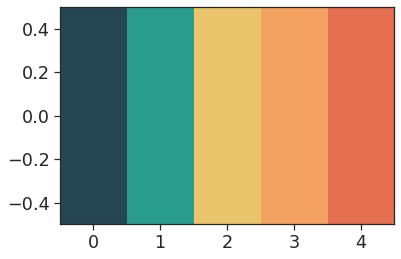

In [52]:
from matplotlib import colors
palette = ['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
cmap = colors.ListedColormap(palette)

plt.imshow(np.arange(len(palette)).reshape(1, -1), aspect='auto', cmap=cmap,origin="lower")
plt.show()

In [2]:
hdf5_file = '/mlodata1/lugeon/dream_data/processed/madison_nrem_binary/dataset_256e.h5'

with h5py.File(hdf5_file, 'r') as f:
    subjects = [s.decode('utf-8') for s in f['subject_name'][:]]
    subject_id = f['subject_id'][:]
    trial_id = f['trial_id'][:]
    sleep_stage = f['sleep_stage'][:]
    labels = f['labels'][:]
    
subjects

['M001', 'M002', 'M003', 'M004', 'M005', 'M006', 'M007']

In [3]:
df = pd.DataFrame({'sid': subject_id, 'tid': trial_id, 'ss': sleep_stage, 'label': labels})
df

,sid,tid,ss,label
0,0.0,0.0,3.0,1.0
1,0.0,0.0,3.0,1.0
2,0.0,0.0,3.0,1.0
3,0.0,0.0,3.0,1.0
4,0.0,0.0,3.0,1.0
...,...,...,...,...
13463,6.0,57.0,3.0,0.0
13464,6.0,57.0,3.0,0.0
13465,6.0,57.0,3.0,0.0
13466,6.0,57.0,3.0,0.0


In [14]:
pos_rate = df.groupby(['sid', 'tid']).label.first().groupby('sid').mean().sort_values()

In [22]:
precisions = np.array([83.33, 62.18, 69.57, 89.19, 89.73, 43.88, 14.73])
recalls = np.array([50.93, 67.36, 36.78, 52.38, 80.86, 44.79, 78.57])

In [33]:
pos_rate_argsort = pos_rate.index.values.astype(int)

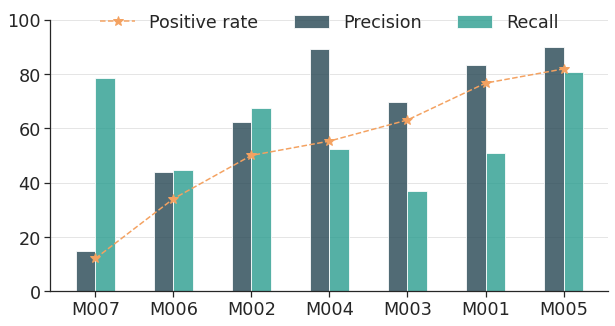

In [105]:
width = 0.25
x = np.arange(len(subjects))
labels = np.array(subjects)[pos_rate_argsort]
#labels = [f'{m}\n({100*p:.0f}%)' for m, p in zip(labels, pos_rate.values)]


fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, precisions[pos_rate_argsort], width, color=cmap(0), alpha=0.8, label='Precision')
ax.bar(x + width/2, recalls[pos_rate_argsort], width, color=cmap(1), alpha=0.8, label='Recall')

ax.plot(x, pos_rate * 100, '*--', c=cmap(3), label='Positive rate', ms=10)

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_ylim([0, 100])

for tick in ax.get_yticks():
    ax.axhline(y=tick, color='black', lw=1, zorder=0, alpha=0.1)
    
ax.legend(frameon=False, ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.08))

plt.savefig('img/posrate_vs_precision_recall.pdf', bbox_inches='tight')

plt.show()

In [103]:
pos_rate

sid
6.0    0.120690
5.0    0.340426
1.0    0.500000
3.0    0.552632
2.0    0.630435
0.0    0.765957
4.0    0.818182
Name: label, dtype: float32